In [1]:
import findspark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


findspark.init()

In [2]:
%matplotlib inline

In [3]:
from pyspark.sql import SparkSession

In [4]:
# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
df = spark.sparkContext\
        .parallelize([(1, 2, 3, 'a b c'),
            (4, 5, 6, 'd e f'),
            (7, 8, 9, 'g h i')])\
        .toDF(['col1', 'col2', 'col3','col4'])
df.show()

+----+----+----+-----+
|col1|col2|col3| col4|
+----+----+----+-----+
|   1|   2|   3|a b c|
|   4|   5|   6|d e f|
|   7|   8|   9|g h i|
+----+----+----+-----+



In [6]:
df = spark.read.format('com.databricks.spark.csv').\
                                options(header='true', \
                                inferschema='true').\
load("Building_Permits.csv", header=True)
df.show(2)


+-------------+-----------+----------------------+--------------------+-----+---+-------------+--------------------+-----------+-------------+----+-----------+--------------------+--------------+-------------------+----------+-----------+--------------+--------------------------------+-----------------------+--------------------------+--------------------------+-----------------------------+----------------+----------------------+--------------+------------+-------------------+--------------+------------+--------------+--------+---------------+--------------------------+--------------------------------------+--------------------------+--------------------------------------+-----------+-------------------+-----------------------------------+-------+--------------------+-------------+
|Permit Number|Permit Type|Permit Type Definition|Permit Creation Date|Block|Lot|Street Number|Street Number Suffix|Street Name|Street Suffix|Unit|Unit Suffix|         Description|Current Status|Current Sta

In [7]:
df.printSchema()

root
 |-- Permit Number: string (nullable = true)
 |-- Permit Type: integer (nullable = true)
 |-- Permit Type Definition: string (nullable = true)
 |-- Permit Creation Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- Lot: string (nullable = true)
 |-- Street Number: integer (nullable = true)
 |-- Street Number Suffix: string (nullable = true)
 |-- Street Name: string (nullable = true)
 |-- Street Suffix: string (nullable = true)
 |-- Unit: integer (nullable = true)
 |-- Unit Suffix: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Current Status: string (nullable = true)
 |-- Current Status Date: string (nullable = true)
 |-- Filed Date: string (nullable = true)
 |-- Issued Date: string (nullable = true)
 |-- Completed Date: string (nullable = true)
 |-- First Construction Document Date: string (nullable = true)
 |-- Structural Notification: string (nullable = true)
 |-- Number of Existing Stories: string (nullable = true)
 |-- Number of

In [8]:
df.columns

['Permit Number',
 'Permit Type',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Number',
 'Street Number Suffix',
 'Street Name',
 'Street Suffix',
 'Unit',
 'Unit Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Structural Notification',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Plansets',
 'TIDF Compliance',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Site Permit',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location',
 'Record ID']

In [9]:
df.fillna(0).show()

+-------------+-----------+----------------------+--------------------+-----+----+-------------+--------------------+-----------+-------------+----+-----------+--------------------+--------------+-------------------+----------+-----------+--------------+--------------------------------+-----------------------+--------------------------+--------------------------+-----------------------------+----------------+----------------------+--------------+------------+-------------------+--------------+-----------------+--------------+--------+---------------+--------------------------+--------------------------------------+--------------------------+--------------------------------------+-----------+-------------------+-----------------------------------+-------+--------------------+-------------+
|Permit Number|Permit Type|Permit Type Definition|Permit Creation Date|Block| Lot|Street Number|Street Number Suffix|Street Name|Street Suffix|Unit|Unit Suffix|         Description|Current Status|Curr

In [10]:
ds=df.fillna(0)

In [11]:
ds.show(2)

+-------------+-----------+----------------------+--------------------+-----+---+-------------+--------------------+-----------+-------------+----+-----------+--------------------+--------------+-------------------+----------+-----------+--------------+--------------------------------+-----------------------+--------------------------+--------------------------+-----------------------------+----------------+----------------------+--------------+------------+-------------------+--------------+------------+--------------+--------+---------------+--------------------------+--------------------------------------+--------------------------+--------------------------------------+-----------+-------------------+-----------------------------------+-------+--------------------+-------------+
|Permit Number|Permit Type|Permit Type Definition|Permit Creation Date|Block|Lot|Street Number|Street Number Suffix|Street Name|Street Suffix|Unit|Unit Suffix|         Description|Current Status|Current Sta

In [12]:
df.collect()

[Row(Permit Number='201505065519', Permit Type=4, Permit Type Definition='sign - erect', Permit Creation Date='05/06/2015', Block='0326', Lot='023', Street Number=140, Street Number Suffix=None, Street Name='Ellis', Street Suffix='St', Unit=None, Unit Suffix=None, Description='ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.', Current Status='expired', Current Status Date='12/21/2017', Filed Date='05/06/2015', Issued Date='11/09/2015', Completed Date=None, First Construction Document Date='11/09/2015', Structural Notification=None, Number of Existing Stories='6', Number of Proposed Stories=None, Voluntary Soft-Story Retrofit=None, Fire Only Permit=None, Permit Expiration Date='11/03/2016', Estimated Cost='4000', Revised Cost='4000', Existing Use='tourist hotel/motel', Existing Units='143', Proposed Use=None, Proposed Units=None, Plansets='2', TIDF Compliance=None, Existing Construction Type='3', Existing Construction Type Descri

In [13]:
df.take(2)

[Row(Permit Number='201505065519', Permit Type=4, Permit Type Definition='sign - erect', Permit Creation Date='05/06/2015', Block='0326', Lot='023', Street Number=140, Street Number Suffix=None, Street Name='Ellis', Street Suffix='St', Unit=None, Unit Suffix=None, Description='ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.', Current Status='expired', Current Status Date='12/21/2017', Filed Date='05/06/2015', Issued Date='11/09/2015', Completed Date=None, First Construction Document Date='11/09/2015', Structural Notification=None, Number of Existing Stories='6', Number of Proposed Stories=None, Voluntary Soft-Story Retrofit=None, Fire Only Permit=None, Permit Expiration Date='11/03/2016', Estimated Cost='4000', Revised Cost='4000', Existing Use='tourist hotel/motel', Existing Units='143', Proposed Use=None, Proposed Units=None, Plansets='2', TIDF Compliance=None, Existing Construction Type='3', Existing Construction Type Descri

In [14]:
rdd1=sc.textFile("Building_Permits.csv")

In [15]:
rdd1.first()

'Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID'

In [16]:
rdd1.take(5)

['Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID',
 '201505065519,4,sign - erect,05/06/2015,0326,023,140,,Ellis,St,,,"ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.",expired,12/21/2017,05/06/2015,11/09/2015,,11/09/2015,,6,,,,11

In [17]:
the_heads = rdd1.first()
rdd2 = rdd1.filter(lambda line:line!=the_heads)
rdd2.take(5)

['201505065519,4,sign - erect,05/06/2015,0326,023,140,,Ellis,St,,,"ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.",expired,12/21/2017,05/06/2015,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,4000,tourist hotel/motel,143,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1380611233945',
 '201604195146,4,sign - erect,04/19/2016,0306,007,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,500,tourist hotel/motel,,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1420164406718',
 '201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,,Pacific,Av,,,installation of separating wall,withdrawn,09/26/2017,05/27/2016,,,,,6,6,,,,20000,,retail sales,39,retail sales,39,2,,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",14248565047

In [18]:
df = spark.createDataFrame(rdd1)

TypeError: Can not infer schema for type: <class 'str'>

In [19]:
print (df.columns)

['Permit Number', 'Permit Type', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit', 'Unit Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Structural Notification', 'Number of Existing Stories', 'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Existing Construction Type Description', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location', 'Record ID']


In [20]:
print(df.count())

198900


In [21]:
df.take(2)

[Row(Permit Number='201505065519', Permit Type=4, Permit Type Definition='sign - erect', Permit Creation Date='05/06/2015', Block='0326', Lot='023', Street Number=140, Street Number Suffix=None, Street Name='Ellis', Street Suffix='St', Unit=None, Unit Suffix=None, Description='ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.', Current Status='expired', Current Status Date='12/21/2017', Filed Date='05/06/2015', Issued Date='11/09/2015', Completed Date=None, First Construction Document Date='11/09/2015', Structural Notification=None, Number of Existing Stories='6', Number of Proposed Stories=None, Voluntary Soft-Story Retrofit=None, Fire Only Permit=None, Permit Expiration Date='11/03/2016', Estimated Cost='4000', Revised Cost='4000', Existing Use='tourist hotel/motel', Existing Units='143', Proposed Use=None, Proposed Units=None, Plansets='2', TIDF Compliance=None, Existing Construction Type='3', Existing Construction Type Descri

In [22]:
df.show(2)

+-------------+-----------+----------------------+--------------------+-----+---+-------------+--------------------+-----------+-------------+----+-----------+--------------------+--------------+-------------------+----------+-----------+--------------+--------------------------------+-----------------------+--------------------------+--------------------------+-----------------------------+----------------+----------------------+--------------+------------+-------------------+--------------+------------+--------------+--------+---------------+--------------------------+--------------------------------------+--------------------------+--------------------------------------+-----------+-------------------+-----------------------------------+-------+--------------------+-------------+
|Permit Number|Permit Type|Permit Type Definition|Permit Creation Date|Block|Lot|Street Number|Street Number Suffix|Street Name|Street Suffix|Unit|Unit Suffix|         Description|Current Status|Current Sta

In [23]:
df.head(2)

[Row(Permit Number='201505065519', Permit Type=4, Permit Type Definition='sign - erect', Permit Creation Date='05/06/2015', Block='0326', Lot='023', Street Number=140, Street Number Suffix=None, Street Name='Ellis', Street Suffix='St', Unit=None, Unit Suffix=None, Description='ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.', Current Status='expired', Current Status Date='12/21/2017', Filed Date='05/06/2015', Issued Date='11/09/2015', Completed Date=None, First Construction Document Date='11/09/2015', Structural Notification=None, Number of Existing Stories='6', Number of Proposed Stories=None, Voluntary Soft-Story Retrofit=None, Fire Only Permit=None, Permit Expiration Date='11/03/2016', Estimated Cost='4000', Revised Cost='4000', Existing Use='tourist hotel/motel', Existing Units='143', Proposed Use=None, Proposed Units=None, Plansets='2', TIDF Compliance=None, Existing Construction Type='3', Existing Construction Type Descri

In [24]:
df.dropDuplicates()

DataFrame[Permit Number: string, Permit Type: int, Permit Type Definition: string, Permit Creation Date: string, Block: string, Lot: string, Street Number: int, Street Number Suffix: string, Street Name: string, Street Suffix: string, Unit: int, Unit Suffix: string, Description: string, Current Status: string, Current Status Date: string, Filed Date: string, Issued Date: string, Completed Date: string, First Construction Document Date: string, Structural Notification: string, Number of Existing Stories: string, Number of Proposed Stories: string, Voluntary Soft-Story Retrofit: string, Fire Only Permit: string, Permit Expiration Date: string, Estimated Cost: string, Revised Cost: string, Existing Use: string, Existing Units: string, Proposed Use: string, Proposed Units: string, Plansets: string, TIDF Compliance: string, Existing Construction Type: string, Existing Construction Type Description: string, Proposed Construction Type: string, Proposed Construction Type Description: string, S

In [25]:
df.count()

198900

In [26]:
from pyspark.sql.functions import count
df.groupby('TIDF Compliance').count().show()

+-------------------+-----+
|    TIDF Compliance|count|
+-------------------+-----+
|              66000|    4|
|              50800|    1|
|                  7|    2|
|               1500|    3|
|    recreation bldg|    1|
|                 15|    4|
|                448|    1|
|                282|    2|
|             office|   86|
|barber/beauty salon|    1|
|                 42|    2|
|              26000|    2|
|       retail sales|   11|
|                356|    2|
|                  3|   45|
|              75000|    1|
|         vacant lot|    2|
|                 59|    1|
|              62600|    1|
|                250|    1|
+-------------------+-----+
only showing top 20 rows



In [27]:
#df= df.drop('TIDF Compliance')
df.groupby('Voluntary Soft-Story Retrofit').count().show()

+-----------------------------+-----+
|Voluntary Soft-Story Retrofit|count|
+-----------------------------+-----+
|                   10/18/2017|    3|
|                   02/20/2014|    1|
|                            7|   15|
|                   12/03/2015|    1|
|                   10/30/2017|    1|
|                   03/19/2014|    1|
|                   02/04/2014|    1|
|                   05/11/2015|    2|
|                           15|    1|
|                   09/16/2013|    1|
|                   09/11/2013|    1|
|                   07/24/2014|    1|
|                   05/10/2016|    1|
|                   01/07/2016|    1|
|                   05/20/2015|    1|
|                   02/25/2013|    1|
|                           11|    7|
|                   04/19/2017|    1|
|                   01/23/2017|    1|
|                   07/14/2014|    1|
+-----------------------------+-----+
only showing top 20 rows



In [28]:
df.groupby('Site Permit').count().show()

+--------------------+------+
|         Site Permit| count|
+--------------------+------+
|              office|     2|
|       constr type 3|    59|
|                   3|    19|
|       constr type 4|     3|
|                   0|    15|
|                null|191769|
|                   5|   412|
|                   Y|  5278|
|   1 family dwelling|     2|
|       constr type 2|    27|
|       constr type 1|   228|
|      wood frame (5)|   853|
|                 186|     1|
|                   1|   178|
|clinics-medic/dental|     1|
|                 420|     1|
|                   4|     1|
|                 123|     1|
|          apartments|     1|
|                   2|    48|
+--------------------+------+
only showing top 20 rows



In [29]:
df= df.drop('Site Permit','Voluntary Soft-Story Retrofit','TIDF Compliance','Permit Number','Permit Creation Date','Block')
df =df.drop('Lot','Street Number Suffix','Unit','Current Status','Completed Date','Voluntary Soft-Story Retrofit')
df =df.drop('Plansets','TIDF Compliance','Existing Construction Type','Existing Construction Type Description')
df =df.drop('Proposed Construction Type','Proposed Construction Type Description','Site Permit','Supervisor District')
df =df.drop('Record ID')

In [30]:
df.columns

['Permit Type',
 'Permit Type Definition',
 'Street Number',
 'Street Name',
 'Street Suffix',
 'Unit Suffix',
 'Description',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'First Construction Document Date',
 'Structural Notification',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Fire Only Permit',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location']

In [31]:
missing_col=[]
for col in df.columns:
    df_filter = (df.filter(df[col]=="0")).count()
    if(df_filter>0):
        missing_col.append(col)
print (missing_col)

['Street Number', 'Unit Suffix', 'Number of Existing Stories', 'Number of Proposed Stories', 'Fire Only Permit', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Neighborhoods - Analysis Boundaries', 'Zipcode']


In [32]:
df.groupby('Zipcode').count().show()

+-----------------+-----+
|          Zipcode|count|
+-----------------+-----+
|            94102| 7095|
|                7|   37|
|            94107| 7634|
|     Inner Sunset|   29|
|   Haight Ashbury|   30|
|               11|   15|
|            94104| 4167|
|    constr type 3|    5|
|        Japantown|    2|
|                3|   72|
|    constr type 4|    1|
|            94131| 7582|
|      North Beach|    9|
|Lone Mountain/USF|   10|
|                8|   58|
| Western Addition|   20|
|   Bernal Heights|   31|
|      Mission Bay|    8|
|                0|    1|
|     Hayes Valley|   23|
+-----------------+-----+
only showing top 20 rows



In [33]:
df.groupby('Zipcode').count().orderBy('count',ascending = False).show(10)

+-------+-----+
|Zipcode|count|
+-------+-----+
|  94110|17651|
|  94114|13273|
|  94117|11662|
|  94109|11267|
|  94103|10884|
|  94115| 9995|
|  94118| 9711|
|  94123| 9412|
|  94122| 8811|
|  94105| 8479|
+-------+-----+
only showing top 10 rows



In [34]:
df.describe(['Issued Date','Estimated Cost','Description','Issued Date','Description']).show()

+-------+--------------------+------------------+--------------------+--------------------+--------------------+
|summary|         Issued Date|    Estimated Cost|         Description|         Issued Date|         Description|
+-------+--------------------+------------------+--------------------+--------------------+--------------------+
|  count|              184088|            160106|              198610|              184088|              198610|
|   mean|    2.61585069837E11|169831.27724884317|              1371.5|    2.61585069837E11|              1371.5|
| stddev|5.503477777171222E11|3649113.7603037637|  1918.4967205253874|5.503477777171222E11|  1918.4967205253874|
|    min|  23 speaker/stro...|        01/01/2015|"""518 waller"" -...|  23 speaker/stro...|"""518 waller"" -...|
|    max|           withdrawn|   new landscaping|~kf21&partial dem...|           withdrawn|~kf21&partial dem...|
+-------+--------------------+------------------+--------------------+--------------------+-----

# EXPLORATORY DATA ANALYSIS

In [35]:
df_plot=df.toPandas()
df_plot['Estimated Cost']=df_plot['Estimated Cost'].fillna(1)    


In [36]:
df_plot = df_plot.rename(columns={'Existing Units':'UNITS','Estimated Cost':'EstCost','Number of Proposed Stories':'PropStories'})

In [37]:
xa = pd.Series(df_plot['EstCost']).astype(str)

In [38]:
df_plot.columns

Index(['Permit Type', 'Permit Type Definition', 'Street Number', 'Street Name',
       'Street Suffix', 'Unit Suffix', 'Description', 'Current Status Date',
       'Filed Date', 'Issued Date', 'First Construction Document Date',
       'Structural Notification', 'Number of Existing Stories', 'PropStories',
       'Fire Only Permit', 'Permit Expiration Date', 'EstCost', 'Revised Cost',
       'Existing Use', 'UNITS', 'Proposed Use', 'Proposed Units',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location'],
      dtype='object')

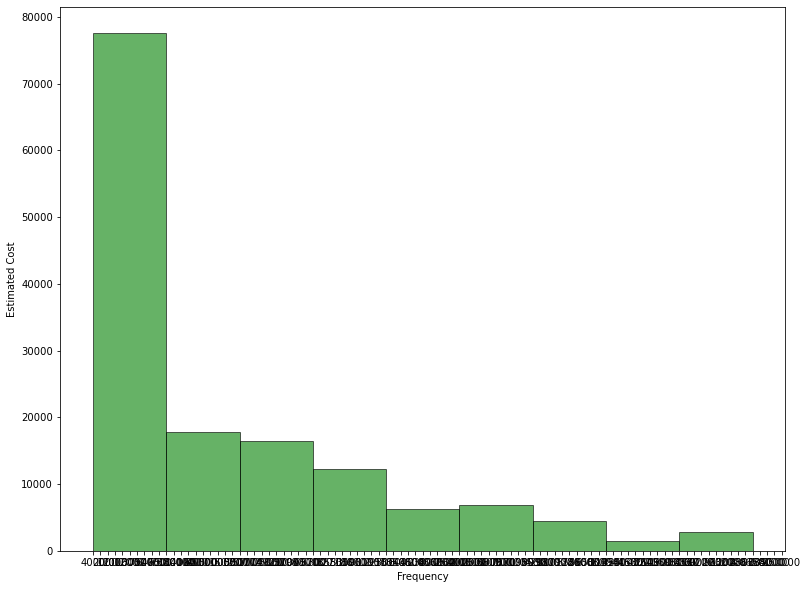

In [39]:
bins = np.arange(0,100,10)
plt.figure(figsize=(13,10))
plt.hist(xa,bins,alpha=0.6,histtype='bar',facecolor='green',ec='black')

plt.xlabel('Frequency')
plt.ylabel('Estimated Cost')
plt.show()

In [40]:
units = df_plot[np.isfinite(pd.to_numeric(df_plot.UNITS, errors = 'coerce'))]
uns = units['UNITS'].dropna()

In [41]:
uns.count()

146259

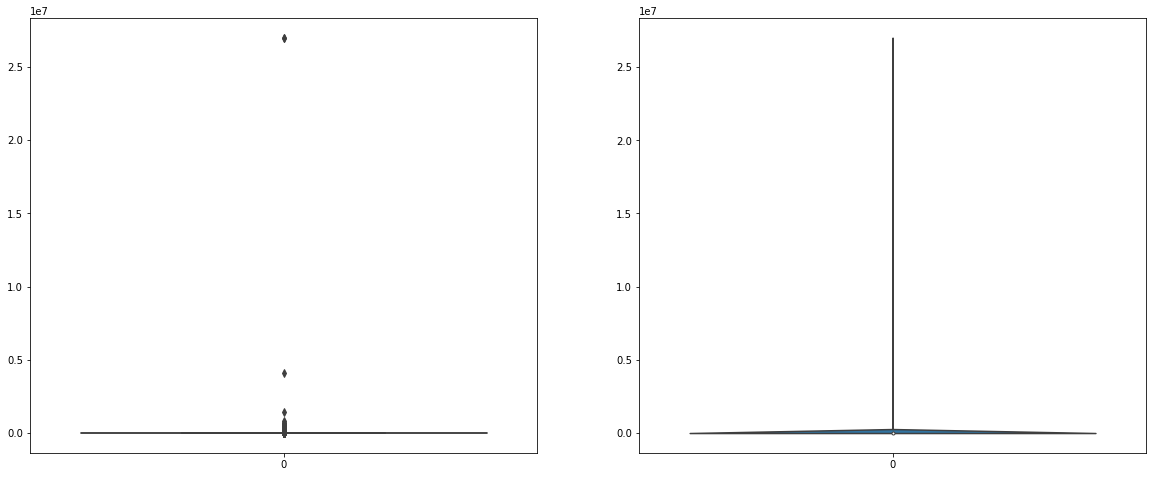

In [42]:

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,2,1)
ax=sns.boxplot(data=uns)

ax = fig.add_subplot(1,2,2)
ax = sns.violinplot(data=uns)

In [43]:
est_cost = df_plot[np.isfinite(pd.to_numeric(df_plot.EstCost,errors = 'coerce'))]
estcost = est_cost['EstCost'].dropna().astype('float64')
estcost

0           4000.0
1              1.0
2          20000.0
3           2000.0
4         100000.0
            ...   
198895         1.0
198896      5000.0
198897         1.0
198898         1.0
198899         1.0
Name: EstCost, Length: 197858, dtype: float64

In [44]:
units = df_plot[np.isfinite(pd.to_numeric(df_plot.UNITS,errors = 'coerce'))]
bunits = units['UNITS'].dropna().astype('float64')

In [45]:
x = estcost[1:100000]
y = bunits[1:100000]

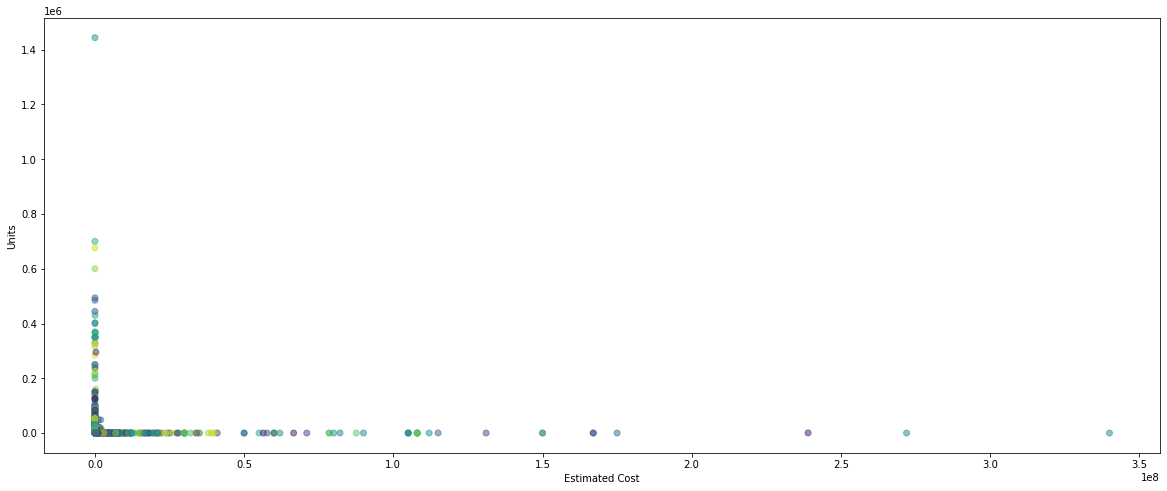

In [46]:
N = 50
colors = np.random.rand(99999)
area = (30*np.random.rand(N)) **2
fig = plt.figure(figsize=(20,8))
plt.scatter(x,y, c=colors, alpha=0.5)
plt.xlabel('Estimated Cost')
plt.ylabel('Units')
plt.show()

<AxesSubplot:xlabel='EstCost', ylabel='UNITS'>

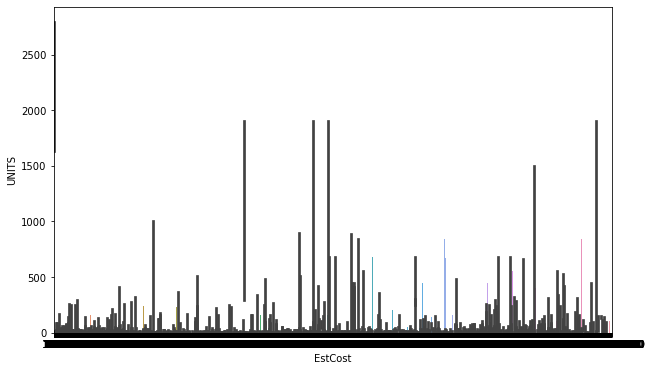

In [47]:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x,y=y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstCost', ylabel='Density'>

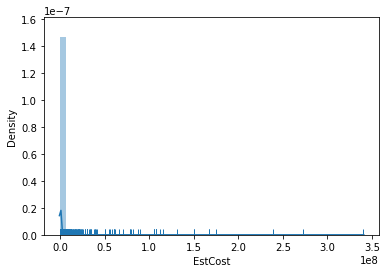

In [48]:
sns.distplot(x, rug =True)

In [49]:
cost_units = df_plot[['EstCost','UNITS']].fillna(0).astype(str)
cost_units

,EstCost,UNITS
0,4000,143
1,1,0
2,20000,39
3,2000,1
4,100000,0
...,...,...
198895,1,0
198896,5000,4
198897,1,0
198898,1,0


In [50]:
est_cost = df_plot[np.isfinite(pd.to_numeric(df_plot.EstCost,errors = 'coerce'))]
est_cost = est_cost['EstCost'].dropna().astype(str)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstCost', ylabel='Density'>

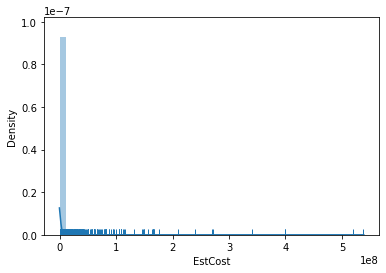

In [51]:
sns.distplot(est_cost, rug =True)

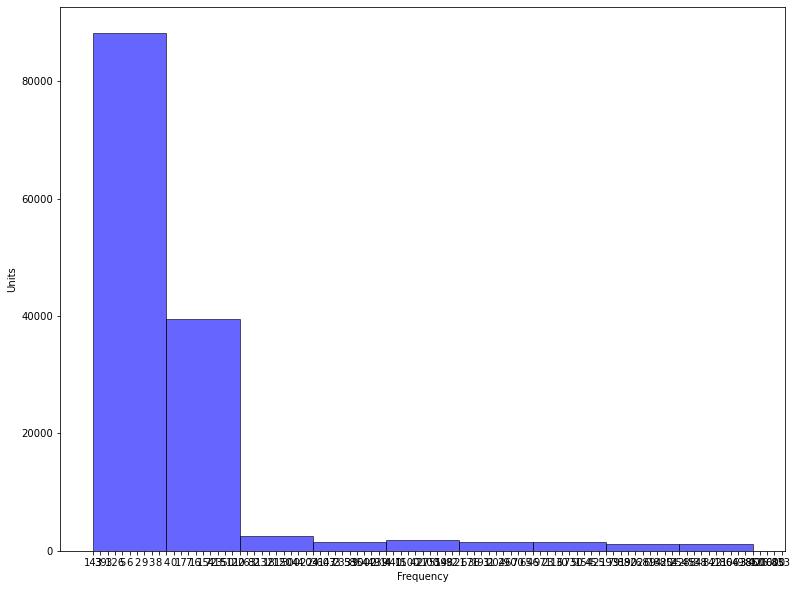

In [52]:
bins = np.arange(0,100,10)
plt.figure(figsize=(13,10))
plt.hist(uns,bins,alpha=0.6,histtype='bar',facecolor='blue',ec='black')

plt.xlabel('Frequency')
plt.ylabel('Units')
plt.show()

In [53]:
df_plot.columns

Index(['Permit Type', 'Permit Type Definition', 'Street Number', 'Street Name',
       'Street Suffix', 'Unit Suffix', 'Description', 'Current Status Date',
       'Filed Date', 'Issued Date', 'First Construction Document Date',
       'Structural Notification', 'Number of Existing Stories', 'PropStories',
       'Fire Only Permit', 'Permit Expiration Date', 'EstCost', 'Revised Cost',
       'Existing Use', 'UNITS', 'Proposed Use', 'Proposed Units',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location'],
      dtype='object')

In [54]:
df_plot = df_plot.rename(columns={'Number of Existing Stories':'ExtStories'})

In [55]:
pair = df_plot[['EstCost','UNITS','ExtStories','PropStories']].dropna()

In [56]:
plot_df = pair.replace(np.nan, 1)

In [58]:
extStories = pair[np.isfinite(pd.to_numeric(pair.ExtStories,errors = 'coerce'))]
extStories = extStories['ExtStories']
extStories

2         6
3         2
5         5
6         3
13        2
         ..
198891    2
198892    3
198893    3
198894    2
198896    4
Name: ExtStories, Length: 142841, dtype: object

In [59]:
propStories = pair[np.isfinite(pd.to_numeric(pair.PropStories,errors = 'coerce'))]
propStories = propStories['PropStories']
propStories

2         6
3         2
5         5
6         3
13        2
         ..
198891    2
198892    3
198893    3
198894    2
198896    4
Name: PropStories, Length: 142907, dtype: object

In [60]:
uns

0         143
2          39
3           1
5         326
6           5
         ... 
198891      0
198892      5
198893      3
198894      2
198896      4
Name: UNITS, Length: 146259, dtype: object

In [61]:
est_cost

0           4000
1              1
2          20000
3           2000
4         100000
           ...  
198895         1
198896      5000
198897         1
198898         1
198899         1
Name: EstCost, Length: 197858, dtype: object

In [62]:
frame = {'EstCost':est_cost,'units':uns,'ExistStories':extStories,'PropStories':propStories}
pair = pd.DataFrame(frame)

In [63]:
pair.dropna()

,EstCost,units,ExistStories,PropStories
2,20000,39,6,6
3,2000,1,2,2
5,4000,326,5,5
6,12000,5,3,3
13,30000,1,2,2
...,...,...,...,...
198891,1,0,2,2
198892,55000,5,3,3
198893,2800,3,3,3
198894,7400,2,2,2


In [64]:
new_df = df_plot[['UNITS','EstCost','ExtStories','Location']]
new_df = new_df.dropna()
new_df

,UNITS,EstCost,ExtStories,Location
0,143,4000,6,"(37.785719256680785, -122.40852313194863)"
2,39,20000,6,"(37.7946573324287, -122.42232562979227)"
3,1,2000,2,"(37.79595867909168, -122.41557405519474)"
5,326,4000,5,"(37.75922331346539, -122.39170402628598)"
6,5,12000,3,"(37.764145640138565, -122.46875112470363)"
...,...,...,...,...
198877,1,1000,2,"(37.7146765393289, -122.45557353560899)"
198878,4,20000,2,"(37.752661001157854, -122.41485533400166)"
198879,1,18453.12,2,"(37.72324934238285, -122.43409219261636)"
198882,1,1,2,"(37.723206757170836, -122.42763728105176)"


In [65]:
lat = []
lon = []

for row in new_df['Location']:
    try:
        lat.append(row.strip('()').split(', ')[0])
        lon.append(row.strip('()').split(', ')[1])
    except:
        pass
        
new_df['Latitude'] = pd.Series(lat)
new_df['Longitude'] = pd.Series(lon)

new_df = new_df.dropna()
new_df

,UNITS,EstCost,ExtStories,Location,Latitude,Longitude
0,143,4000,6,"(37.785719256680785, -122.40852313194863)",37.785719256680785,-122.40852313194863
2,39,20000,6,"(37.7946573324287, -122.42232562979227)",37.79595867909168,-122.41557405519474
3,1,2000,2,"(37.79595867909168, -122.41557405519474)",37.75922331346539,-122.39170402628598
5,326,4000,5,"(37.75922331346539, -122.39170402628598)",37.7462205625642,-122.4353484860549
6,5,12000,3,"(37.764145640138565, -122.46875112470363)",37.8035183252307,-122.42863180996076
...,...,...,...,...,...,...
144270,0,3100,1,"(37.727739796614884, -122.40394270756961)",37.795606967751475,-122.45557353560899
144271,28,1,3,"(37.76785528331613, -122.4224844061066)",37.75611621501881,-122.41485533400166
144272,0,3100,1,"(37.727739796614884, -122.40394270756961)",37.72557237671209,-122.43409219261636
144273,1,20000,2,"(37.77256282114138, -122.50494444040913)",37.76422823656914,-122.42763728105176


In [66]:
new_pair = pair.dropna()

In [67]:
new_pair

,EstCost,units,ExistStories,PropStories
2,20000,39,6,6
3,2000,1,2,2
5,4000,326,5,5
6,12000,5,3,3
13,30000,1,2,2
...,...,...,...,...
198891,1,0,2,2
198892,55000,5,3,3
198893,2800,3,3,3
198894,7400,2,2,2


In [68]:
existStories = new_pair['ExistStories'].astype('float64')
existStories

2         6.0
3         2.0
5         5.0
6         3.0
13        2.0
         ... 
198891    2.0
198892    3.0
198893    3.0
198894    2.0
198896    4.0
Name: ExistStories, Length: 142841, dtype: float64

In [69]:
xcost = new_pair['EstCost'].astype('float64')
xcost

2         20000.0
3          2000.0
5          4000.0
6         12000.0
13        30000.0
           ...   
198891        1.0
198892    55000.0
198893     2800.0
198894     7400.0
198896     5000.0
Name: EstCost, Length: 142841, dtype: float64

In [70]:
xdata = new_pair['units'].astype('float64')
xdata

2          39.0
3           1.0
5         326.0
6           5.0
13          1.0
          ...  
198891      0.0
198892      5.0
198893      3.0
198894      2.0
198896      4.0
Name: units, Length: 142841, dtype: float64

In [71]:
ydata = new_pair['PropStories'].astype('float64')
ydata

2         6.0
3         2.0
5         5.0
6         3.0
13        2.0
         ... 
198891    2.0
198892    3.0
198893    3.0
198894    2.0
198896    4.0
Name: PropStories, Length: 142841, dtype: float64

Text(0, 0.5, 'Existing Stories')

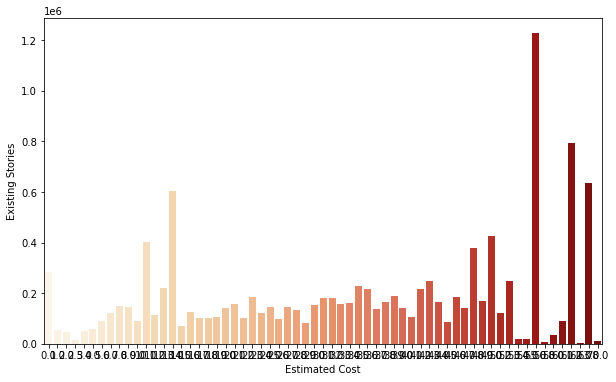

In [72]:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(x=existStories,y=xcost,palette="OrRd",ci=0)
plt.xlabel('Estimated Cost')
plt.ylabel('Existing Stories')

<AxesSubplot:xlabel='units', ylabel='PropStories'>

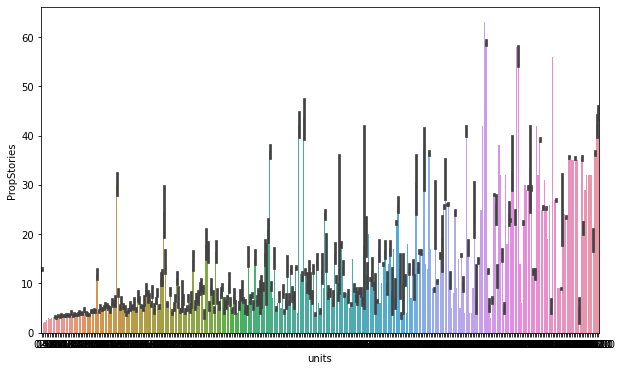

In [73]:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(x=xdata,y=ydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units', ylabel='PropStories'>

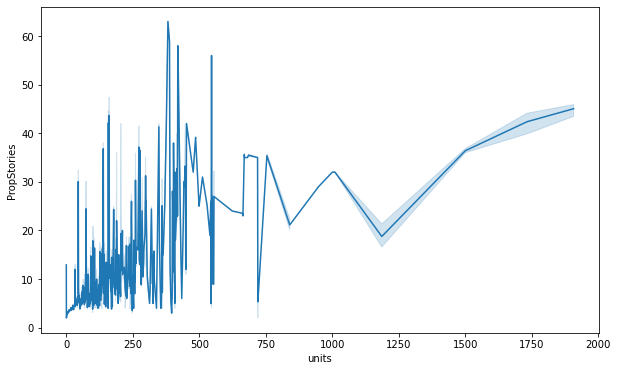

In [74]:
f,ax = plt.subplots(figsize=(10,6))
sns.lineplot(xdata,ydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units', ylabel='PropStories'>

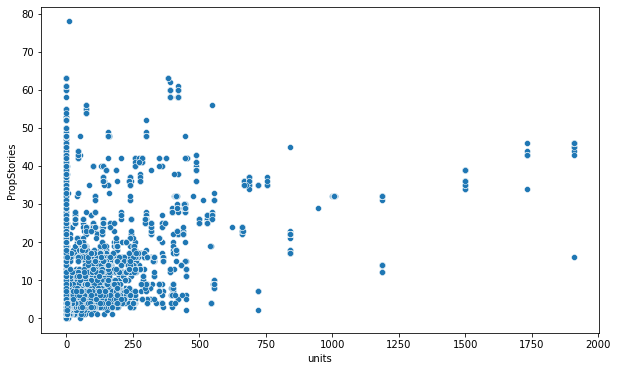

In [75]:
f,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(xdata,ydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units', ylabel='PropStories'>

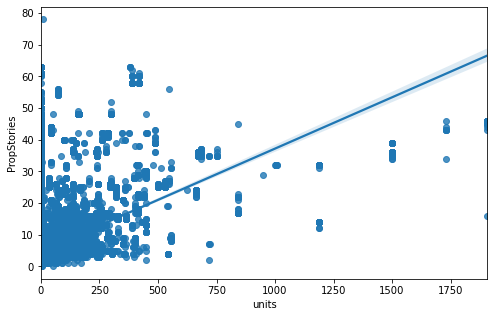

In [76]:
f,ax = plt.subplots(figsize=(8,5))
sns.regplot(xdata, ydata)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstCost', ylabel='units'>

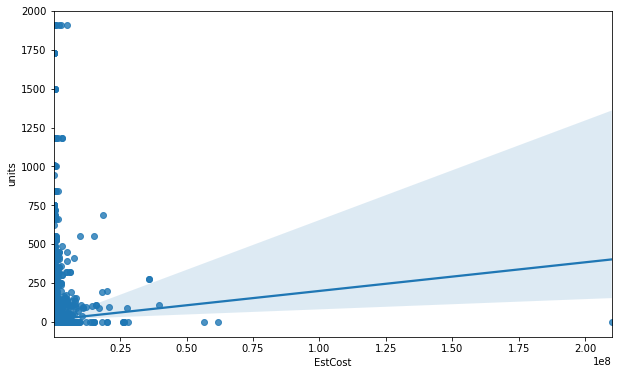

In [77]:
f,ax = plt.subplots(figsize=(10,6))
sns.regplot(xcost, xdata)

<AxesSubplot:xlabel='EstCost', ylabel='PropStories'>

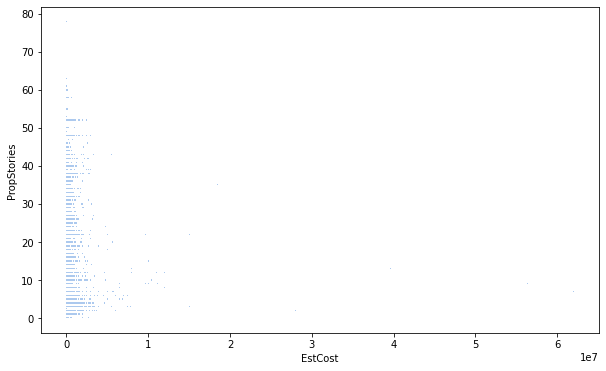

In [78]:
f,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=x, y=ydata, kde=True)

In [79]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [81]:
lats = new_df[~new_df.Latitude.str.contains(r'[@#&$%/*a-zA-Z]')]
lons = new_df[~new_df.Longitude.str.contains(r'[@#&$%/*a-zA-Z]')]
lons

,UNITS,EstCost,ExtStories,Location,Latitude,Longitude
0,143,4000,6,"(37.785719256680785, -122.40852313194863)",37.785719256680785,-122.40852313194863
2,39,20000,6,"(37.7946573324287, -122.42232562979227)",37.79595867909168,-122.41557405519474
3,1,2000,2,"(37.79595867909168, -122.41557405519474)",37.75922331346539,-122.39170402628598
5,326,4000,5,"(37.75922331346539, -122.39170402628598)",37.7462205625642,-122.4353484860549
6,5,12000,3,"(37.764145640138565, -122.46875112470363)",37.8035183252307,-122.42863180996076
...,...,...,...,...,...,...
144270,0,3100,1,"(37.727739796614884, -122.40394270756961)",37.795606967751475,-122.45557353560899
144271,28,1,3,"(37.76785528331613, -122.4224844061066)",37.75611621501881,-122.41485533400166
144272,0,3100,1,"(37.727739796614884, -122.40394270756961)",37.72557237671209,-122.43409219261636
144273,1,20000,2,"(37.77256282114138, -122.50494444040913)",37.76422823656914,-122.42763728105176


In [82]:
lat_data = lats['Latitude'].astype('float64')
lon_data = lons['Longitude'].astype('float64')

In [83]:
new_pair['Latitude'] = pd.Series(lat_data)
new_pair['Longitude'] = pd.Series(lon_data)

<ipython-input-83-5ba3e2d7a75f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pair['Latitude'] = pd.Series(lat_data)
<ipython-input-83-5ba3e2d7a75f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pair['Longitude'] = pd.Series(lon_data)


In [84]:
new_pair.dropna()

,EstCost,units,ExistStories,PropStories,Latitude,Longitude
2,20000,39,6,6,37.795959,-122.415574
3,2000,1,2,2,37.759223,-122.391704
5,4000,326,5,5,37.746221,-122.435348
6,12000,5,3,3,37.803518,-122.428632
13,30000,1,2,2,37.727755,-122.414192
...,...,...,...,...,...,...
144269,10000,2,2,2,37.759374,-122.428518
144270,3100,0,1,1,37.795607,-122.455574
144271,1,28,3,3,37.756116,-122.414855
144273,20000,1,2,2,37.764228,-122.427637


In [85]:
new_pair=new_pair.round({"Latitude":4,"Longitude":4})

In [86]:
def clean_df(df):
    assert isinstance(df,pd.DataFrame), "df needs to be a DataFrame"
    df.dropna(inplace=True)
    inds = ~df.isin([np.nan,np.inf,-np.inf]).any(1)
    return df[inds].astype(np.float64)




In [87]:
new_pair = clean_df(new_pair)

In [233]:
try2 = new_pair.head(1000)

In [234]:
from sklearn.cluster import KMeans
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)


In [235]:
kmeans = KMeans(n_clusters=6)
X = try2.loc[:,["units","EstCost","ExistStories","PropStories","Latitude","Longitude"]]
X["Cluster"] = kmeans.fit_predict(X)
#X["Cluster"] = X["Cluster"].astype("category")

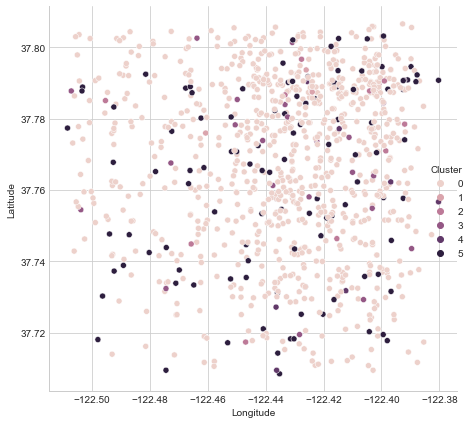

In [236]:
sns.relplot(x="Longitude",y="Latitude",hue="Cluster",data=X,height=6)

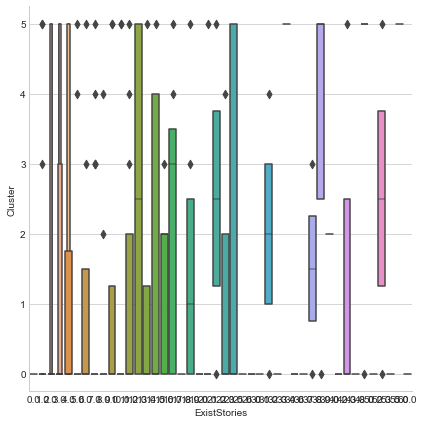

In [249]:
sns.catplot(x="ExistStories", y = "Cluster",data=X, kind="boxen",height=6)

In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [94]:
new_pair.shape

(102374, 6)

In [208]:
new_pair2 = new_pair.head(10000)

In [211]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(try2)

normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
X_principal.head(2)

,P1,P2
0,-0.866361,-0.141014
1,-0.004552,-0.887677


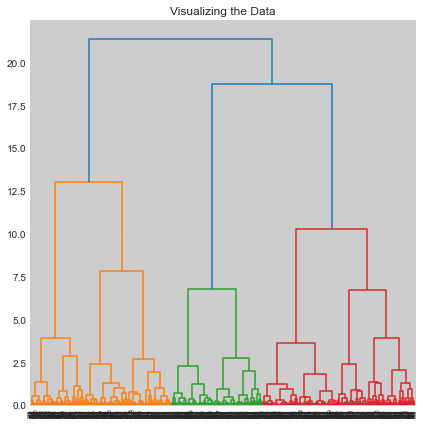

In [126]:
plt.figure(figsize=(6,6))
plt.title('Visualizing the Data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))

# Determining the optimal number of Scores

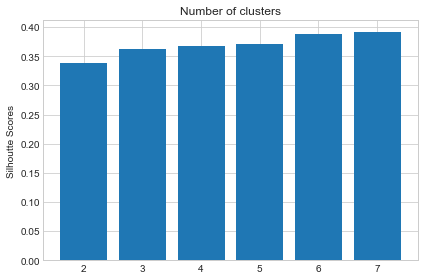

In [112]:
silhouette_scores = []

for n_cluster in range(2,8):
    silhouette_scores.append(silhouette_score(X_principal,AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_principal)))
    
    
    
k = [2,3,4,5,6,7]
f,ax = plt.subplots(figsize=(10,6))
plt.bar(k, silhouette_scores)
plt.title('Number of clusters')
plt.ylabel('Silhoutte Scores')
plt.show()
    

In [113]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

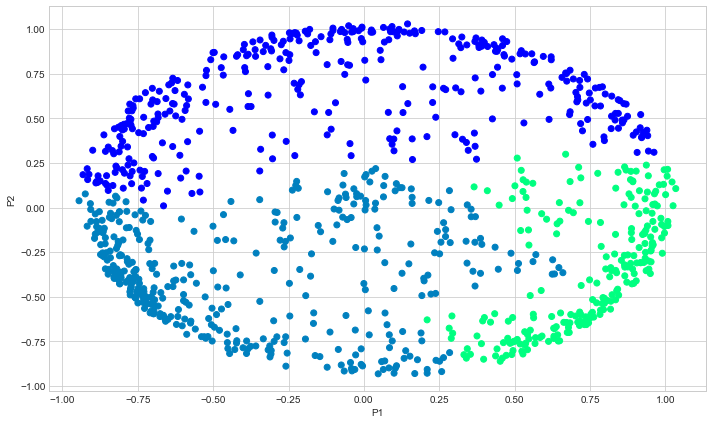

In [250]:
f,ax = plt.subplots(figsize=(10,6))
plt.scatter(X_principal['P1'],X_principal['P2'],
            c = AgglomerativeClustering(n_clusters=3)
            .fit_predict(X_principal), cmap=plt.cm.winter)
plt.xlabel('P1')
plt.ylabel('P2')

plt.show()


In [142]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm  import SVC
import time

In [212]:
new_pair2.isna().sum()

EstCost         0
units           0
ExistStories    0
PropStories     0
Latitude        0
Longitude       0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Units in a building')

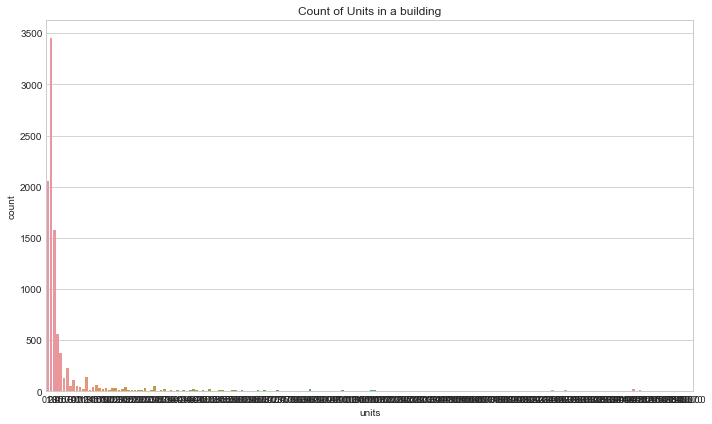

In [213]:

f,ax = plt.subplots(figsize=(10,6))
plt.rcParams["xtick.labelsize"] = 10
ax = sns.countplot(new_pair2['units'], label='Counts')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.title('Count of Units in a building')

In [214]:
new_pair2.dtypes

EstCost         float64
units           float64
ExistStories    float64
PropStories     float64
Latitude        float64
Longitude       float64
dtype: object

Its important to note that the data we are dealing with is not cartegorical by nature, therefore we do not need 
to encode it. 

In [215]:
new_pair2.groupby('units').size()

units
0.0       2051
1.0       3452
2.0       1574
3.0        564
4.0        377
          ... 
754.0        1
840.0        1
1005.0       3
1500.0       1
1907.0       1
Length: 200, dtype: int64

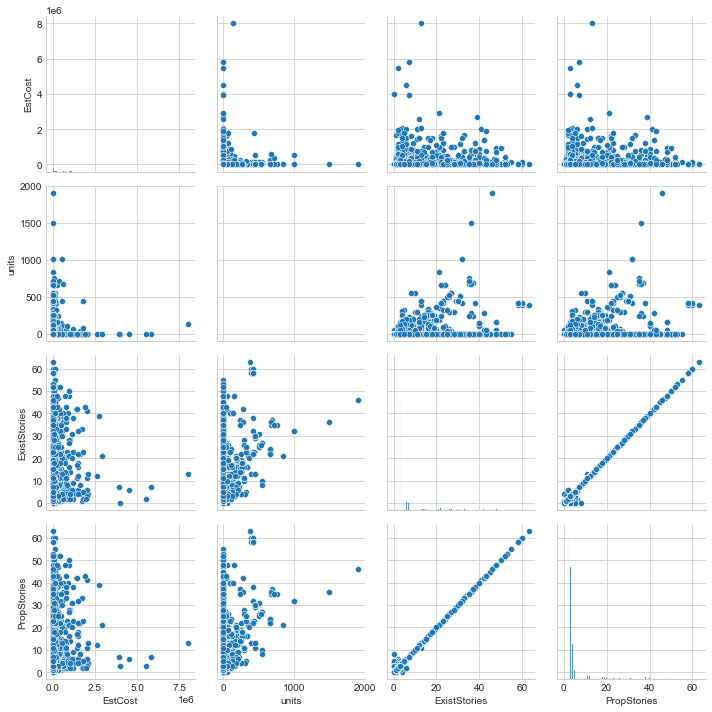

In [216]:
sns.pairplot(new_pair2.iloc[:,0:4])

In [217]:
new_pair2

,EstCost,units,ExistStories,PropStories,Latitude,Longitude
2,20000.0,39.0,6.0,6.0,37.7960,-122.4156
3,2000.0,1.0,2.0,2.0,37.7592,-122.3917
5,4000.0,326.0,5.0,5.0,37.7462,-122.4353
6,12000.0,5.0,3.0,3.0,37.8035,-122.4286
13,30000.0,1.0,2.0,2.0,37.7278,-122.4142
...,...,...,...,...,...,...
14041,2000.0,2.0,3.0,3.0,37.7567,-122.4195
14042,2000.0,2.0,3.0,3.0,37.7593,-122.4332
14043,88515.0,0.0,18.0,18.0,37.7773,-122.3879
14044,15200.0,3.0,3.0,3.0,37.7759,-122.4210


In [218]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
new_pair2.iloc[:,0] = labelencoder_Y.fit_transform(new_pair2.iloc[:,0].values)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [219]:
new_pair2

,EstCost,units,ExistStories,PropStories,Latitude,Longitude
2,706,39.0,6.0,6.0,37.7960,-122.4156
3,117,1.0,2.0,2.0,37.7592,-122.3917
5,214,326.0,5.0,5.0,37.7462,-122.4353
6,536,5.0,3.0,3.0,37.8035,-122.4286
13,822,1.0,2.0,2.0,37.7278,-122.4142
...,...,...,...,...,...,...
14041,117,2.0,3.0,3.0,37.7567,-122.4195
14042,117,2.0,3.0,3.0,37.7593,-122.4332
14043,1008,0.0,18.0,18.0,37.7773,-122.3879
14044,623,3.0,3.0,3.0,37.7759,-122.4210


We want a prediction of the prices of the buildings depending on the Proposed stories, the existing stories and the units. The x data 
is therefore the depend variables and the y data is the dependent variables.

In [220]:
Y = new_pair2['EstCost'].astype('int64').values.reshape(-1,1)
X = new_pair2[['units','ExistStories','PropStories']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [221]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

In [222]:
from sklearn.linear_model import LogisticRegression
LR  = LogisticRegression(random_state=0)
LR.fit(X_train, Y_train.ravel())
LR_score = LR.score(X_test, Y_test) * 100

print('Test Accuracy {:.2f}%'.format(LR_score))

ValueError: Unknown label type: 'continuous'

From the result above its important to note that we are dealing with continous variables that is for example the estimated costs of the buildings. 
The best way to carry out a machine learning algorithm would be therefore to use a regression model since the data is not
categorical. 
For categorical data, we would use classification methods such as Random Forests and Logistic Regression Models.

In [226]:
from sklearn.linear_model import LinearRegression
modelLR  = LinearRegression()
modelLR.fit(X_train, Y_train)
Y_pred = modelLR.predict(X_test)

In [227]:
Y_pred

array([[ 0.63662033],
       [-0.0528687 ],
       [-0.03613258],
       ...,
       [-0.03501901],
       [-0.0528687 ],
       [-0.02106682]])

In [229]:
from sklearn import metrics
print('y_intercept', modelLR.intercept_)
print('Beta coefficients', modelLR.coef_)
print('Mean Absolute Error MAE', metrics.mean_absolute_error(Y_test,Y_pred))
print('Maen Squared Error MSE', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error RMSE',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('r2 Value', metrics.r2_score(Y_test, Y_pred))

y_intercept [-1.93688783e-16]
Beta coefficients [[-0.03626256 -1.09181027  1.23237481]]
Mean Absolute Error MAE 0.8589091678092474
Maen Squared Error MSE 0.9692773069346471
Root Mean Squared Error RMSE 0.9845188200002309
r2 Value 0.030722693065352913
